## 배경

반디캠으로 스크린 레코딩을 하다가 캠이랑 합성을 해주는 기능이 있다는 걸 발견. 그런데 이게 내 뒤에 크로마키로 쓸만한 배경이 없다보니 대충 배경으로 쓸만한 색 잡아서 쓰니까 대충 깨져보이더라.

![반디캠-캠합성](./res/bandicam-cam.jpg)

그래서 혹시 전통적인 크로마키 배경 방식이 아니라 인물(사물)을 detection 하고 그 외의 것을 날려버리는 툴은 없을까 찾아봤다. 왜 없겠냐? 실망스럽게도 이미 잘나가는게 많더라. 그중에서도 뭔가 잘 동작할 것 처럼 보이는 오픈소스([danielgatis/rembg](https://github.com/danielgatis/rembg))를 하나 찾아서 이걸로 테스트를 해보려고 한다.



## rembg

[U2-Net](https://arxiv.org/pdf/2005.09007.pdf)이라는 Object Detection을 위한 딥러닝 모델(딥러닝은 하나도 모르지만..)을 이용해서 배경 이미지를 날리고 테투리 알파(Alpha) 부분을 다듬어서 깔끔하게 배경을 날려주는 도구라고 한다.

![rembg-samples](res/rembg-samples.jpg)

## 테스트 코드

In [1]:
import time
import io
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from rembg.bg import remove as remove_bg

def show_rembg(path):
    fig = plt.figure(figsize=(10, 10))
    
    # show original image
    fig.add_subplot(1, 2, 1)
    orig_img = Image.open(path)
    plt.imshow(orig_img)
    
    # show bg removed image
    fig.add_subplot(1, 2, 2)
    f = np.fromfile(path)
    
    started = time.time()
    result = remove_bg(f)
    elapsed = time.time() - started
    print(f'it takes {elapsed} seconds for removing bg.')
    
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    plt.imshow(img)

it takes 1.6791925430297852 seconds for removing bg.


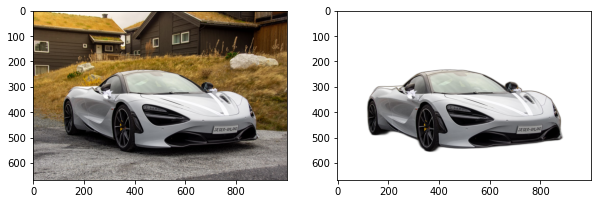

In [2]:
show_rembg('res/car.jpg')

잘 날라가고 대략 1초 정도 걸렸다.

## 여러 상황에 대한 테스트

### 인물

it takes 1.1535193920135498 seconds for removing bg.


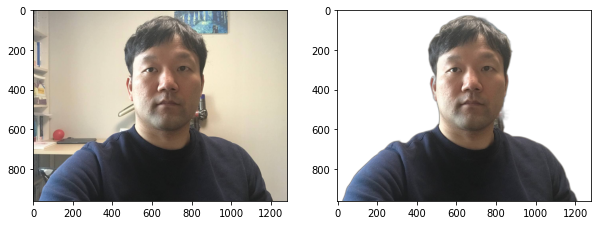

In [3]:
show_rembg('res/portraits/me.jpg')

일단 나. 배경은 잘 날라갔다. 사람인지 인식 못해서 배경 대신 내가 날라갈까 약간 쫄렸는데 휴..

it takes 1.00852370262146 seconds for removing bg.


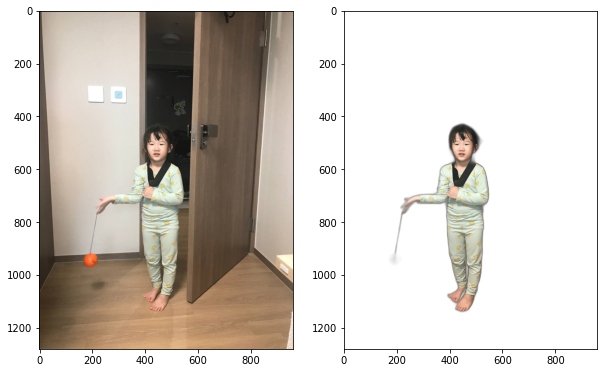

In [4]:
show_rembg('res/portraits/sol.jpg')

우리 솔이. 배경이 감쪽같이 사라졌네. 공은 어디감..

it takes 1.1409850120544434 seconds for removing bg.


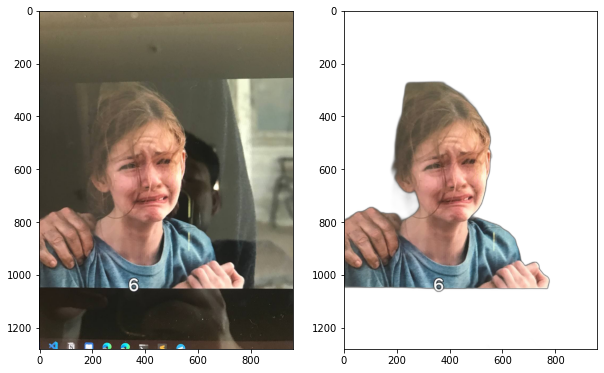

In [5]:
show_rembg('res/portraits/interstellar.jpg')

인터스텔라 쿠퍼가 떠날때 우는 머피. 넷플릭스 영상을 촬영해본 것. 누구 것인지 모를 손도 같이 나옴.

it takes 0.9348576068878174 seconds for removing bg.


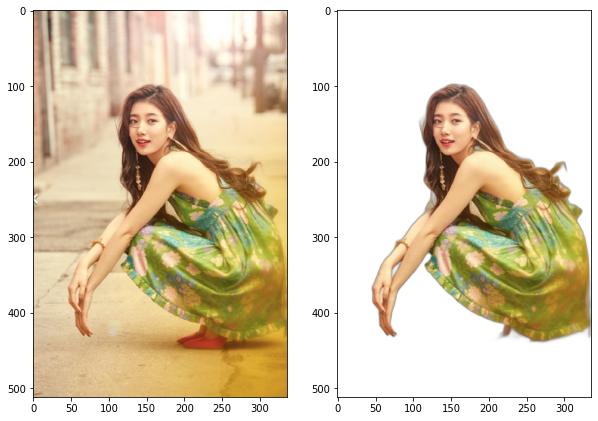

In [6]:
show_rembg('res/portraits/suji.jpg')

수지를 빼놓을 수 없지. 발 어디갔니.

it takes 1.6475119590759277 seconds for removing bg.


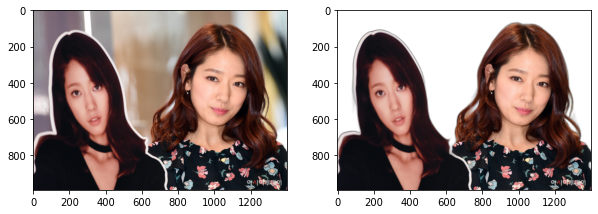

In [7]:
show_rembg('res/objects/sinhye.jpg')

입간판과 함께 있는 박신혜 이건 경계가 뚜렷해서 그런지 아주 잘 뽑힘.

it takes 0.8652827739715576 seconds for removing bg.


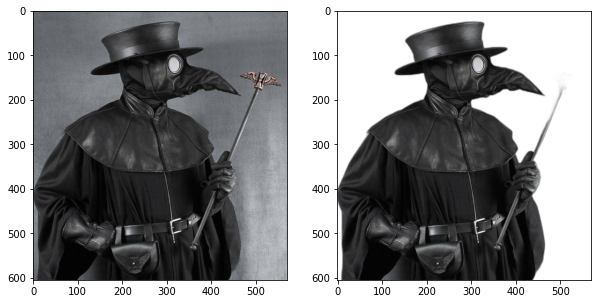

In [8]:
show_rembg('res/portraits/plague-doctor.jpg')

얼굴이 안보여도 잘 인식할까? 마법봉이 사라진게 몹시 당황스러운 역병 의사.

it takes 0.9809269905090332 seconds for removing bg.


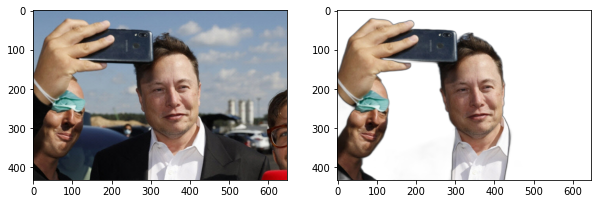

In [9]:
show_rembg('res/portraits/elon-musk.jpg')

말끔한 수트를 차려입은 엘론 머스크. 드레스코드는 화이트.

it takes 1.0448687076568604 seconds for removing bg.


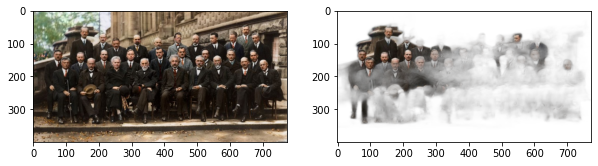

In [10]:
show_rembg('res/portraits/solvay.jpg')

단체 사진도 혹시 인식할까? 솔베이 회의의 흑백 사진을 컬러로 복원한 사진.

이건 뭐지.. 타노스가 왔다갔나.. 죄송합니다 아인슈타인.

### 사물

it takes 1.1104567050933838 seconds for removing bg.


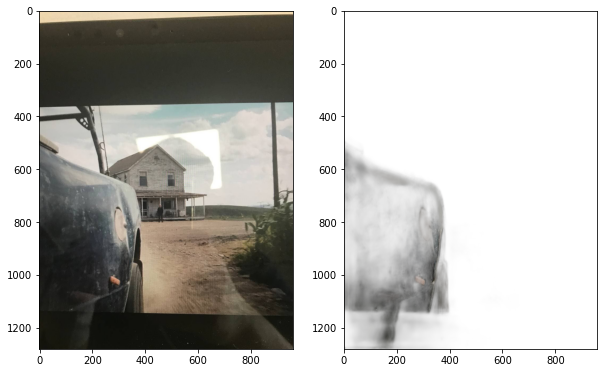

In [11]:
show_rembg('res/objects/interstellar-obj.jpg')

인터스텔라 하나도 안 중요한 장면 촬영. 너도 아는구나 하나도 안중요한거.

it takes 0.8890879154205322 seconds for removing bg.


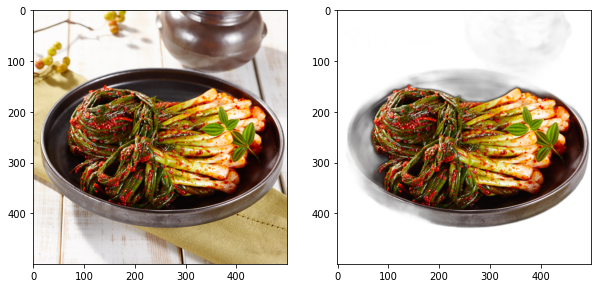

In [12]:
show_rembg('res/objects/kimchi.jpg')

내가 제일 좋아하는 김치, 파김치. 파김치를 더욱 부각시켜주는 샷.

it takes 1.0839574337005615 seconds for removing bg.


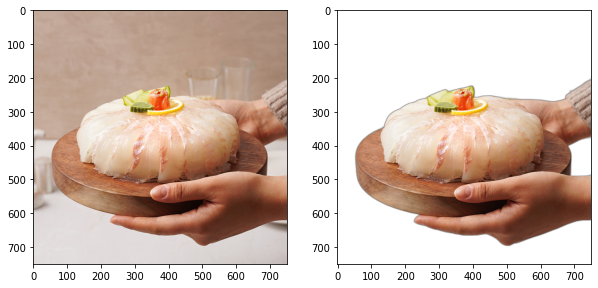

In [13]:
show_rembg('res/objects/kwang-fish.jpg')

꿈의 케이크, 광어 케이크. 광어 부분은 안날라가고 살아있네. 마치 활어회.

it takes 0.9474005699157715 seconds for removing bg.


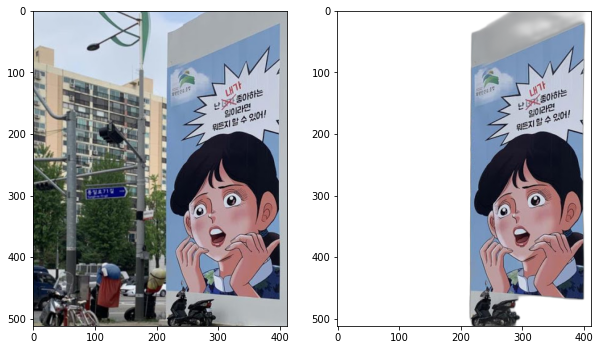

In [14]:
show_rembg('res/objects/apart.jpg')

여느 아파트 벽화. 얼굴부분만도 아니고 벽째로 인식함.

it takes 0.9780840873718262 seconds for removing bg.


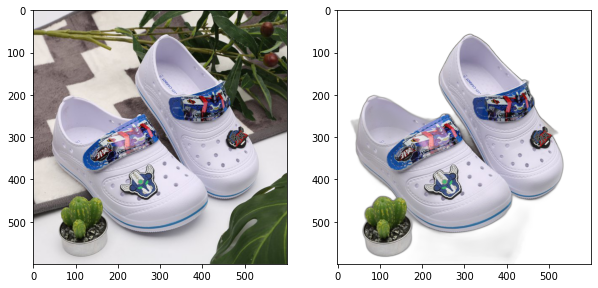

In [15]:
show_rembg('res/objects/hellocarbot-shoes.jpg')

솔이가 사달라고 한 헬로카봇 실내화. 귀엽게 선인장도 같이 뽑혔네.

it takes 1.1822330951690674 seconds for removing bg.


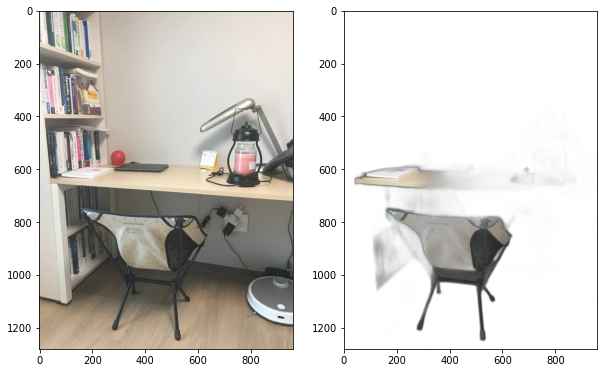

In [16]:
show_rembg('res/objects/desk.jpg')

내 책상. 따위는 필요없지. 다 치워.

### 밝기

it takes 1.1755871772766113 seconds for removing bg.


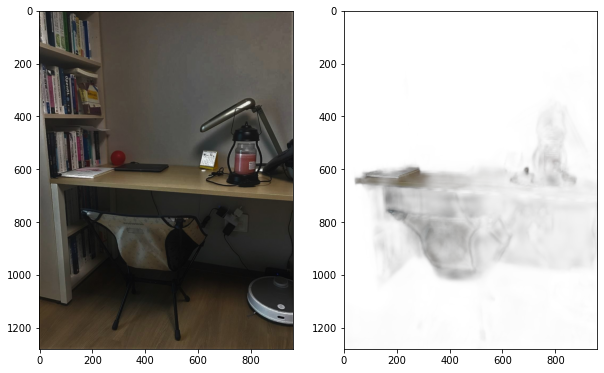

In [17]:
show_rembg('res/brightness/desk-dark.jpg')

조금 밝기를 조절해보면 어떨까. 경계가 더 무너져서 그런지 의자조차도 사라짐.

it takes 1.0420737266540527 seconds for removing bg.


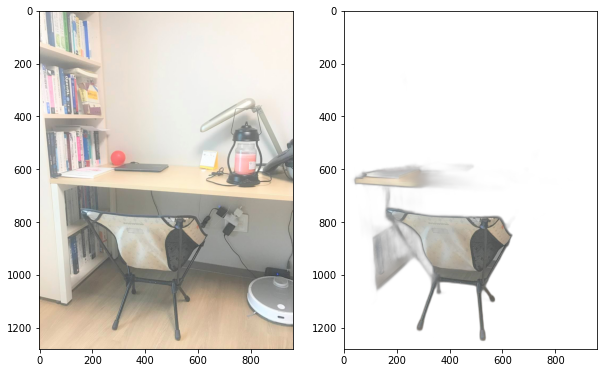

In [18]:
show_rembg('res/brightness/desk-light.jpg')

밝게 한다면? 별 차이 없음.

it takes 0.9458205699920654 seconds for removing bg.


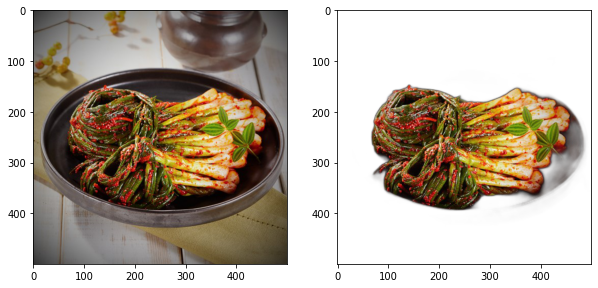

In [19]:
show_rembg('res/brightness/kimchi-dark.jpg')

위의 파김치를 좀 어둡게 한다면? 파김치를 더욱 부각시켜줌. 그르장(그릇)머리 없네.

### 선명도

it takes 1.1243481636047363 seconds for removing bg.


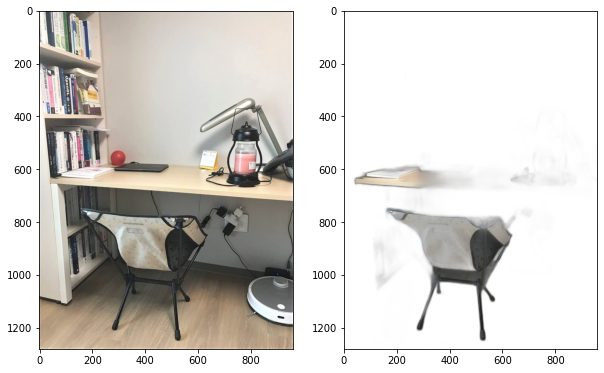

In [20]:
show_rembg('res/sharpness/desk-sharpness.jpg')

선명도를 주면 경계가 잘 잡혀서 잘 되지 않을까? 내 책상은 답이 없음.

it takes 0.9380612373352051 seconds for removing bg.


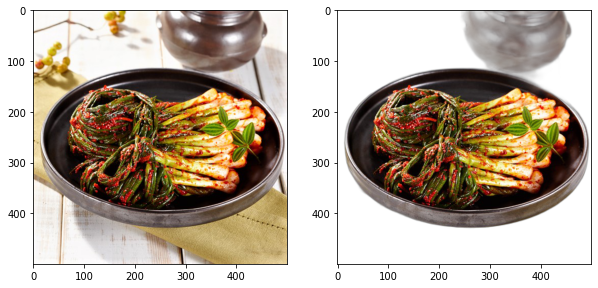

In [21]:
show_rembg('res/sharpness/kimchi-sharpness.jpg')

오! 파김치는 이번엔 그르장머리 있게 잘 뽑힘. 이제 좀 먹음직스럽네요. 아.. 라면 먹고싶다.

### 풍경

it takes 1.0943183898925781 seconds for removing bg.


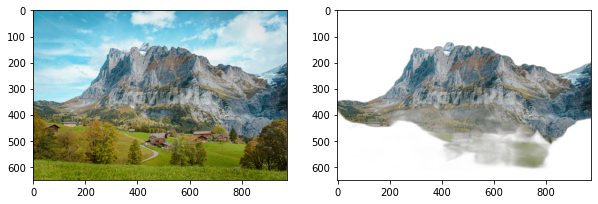

In [22]:
show_rembg('res/landscapes/mountain.jpg')

풍경 사진들을 어떨까? 적어도 뭐가 메인인지는 감을 잡은 것 같긴 함.

it takes 1.0826597213745117 seconds for removing bg.


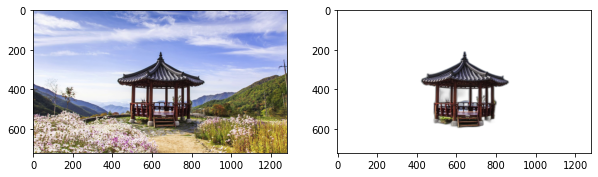

In [23]:
show_rembg('res/landscapes/jungja.jpg')

이것도 마찬가지로 정자가 중요하지 풍경이 뭐 대수냐.

it takes 1.26413893699646 seconds for removing bg.


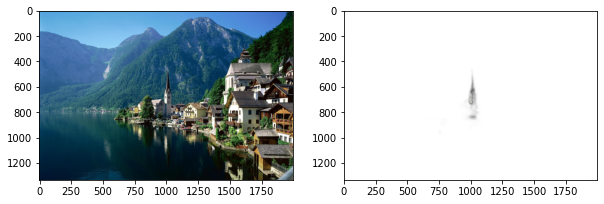

In [24]:
show_rembg('res/landscapes/lakeside.jpg')

it takes 0.9036645889282227 seconds for removing bg.


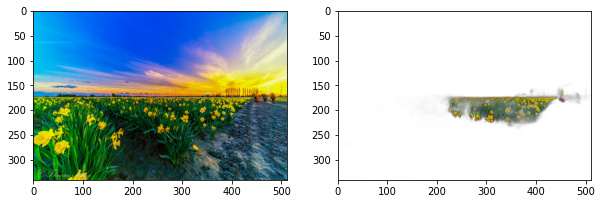

In [25]:
show_rembg('res/landscapes/flower.jpg')

이건 도저히 얘가 어딜 보고 있는지 감을 잡을 수가 없다.

### 만화

it takes 0.9259891510009766 seconds for removing bg.


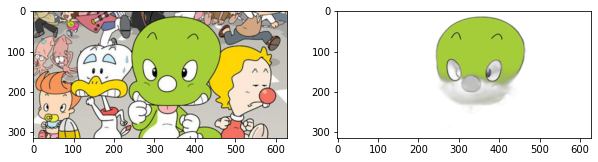

In [26]:
show_rembg('res/cartoons/doolri.jpg')

만화속 캐릭터는 어떨까? 이런 (사람같이 않은) 것들은 잘 인식이 안되는 모양.

it takes 0.9184567928314209 seconds for removing bg.


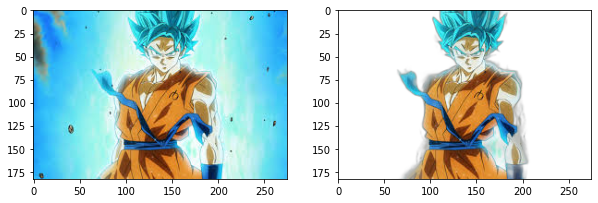

In [27]:
show_rembg('res/cartoons/dragonball.jpg')

드래곤볼 손오공 초사이어인 블루. 사람형상이라 그런지 그래도 윤곽은 잡았다.

it takes 1.021634817123413 seconds for removing bg.


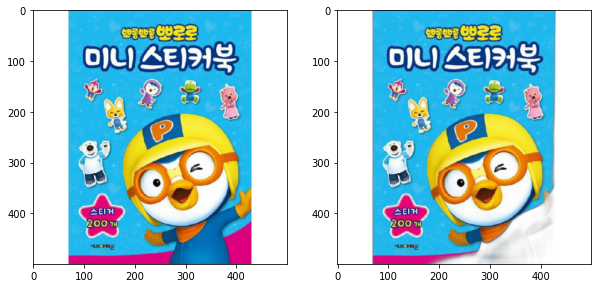

In [28]:
show_rembg('res/cartoons/pororo.jpg')

적어도 딥러닝 모델에게 뽀로로는 듣보가 아닐까. 그냥 네모난 책 자체로 인식한 모양.

it takes 0.9066402912139893 seconds for removing bg.


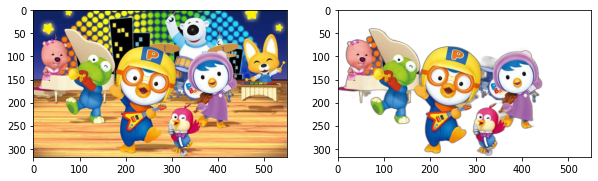

In [29]:
show_rembg('res/cartoons/pororo-friends.jpg')

뽀로로 친구들 한번 더. 포비랑 에디 지못미..

### 해상도

it takes 1.5494115352630615 seconds for removing bg.


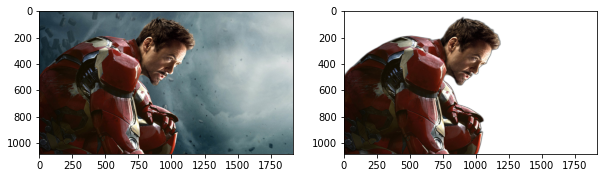

In [30]:
show_rembg('res/resolutions/ironman-1920x1080.jpg')

이번엔 해상도 별로 처리시간이 얼마나 걸리나 좀 보고 싶었다. 일단 1920x1080, 1.5초 정도.

it takes 1.118943452835083 seconds for removing bg.


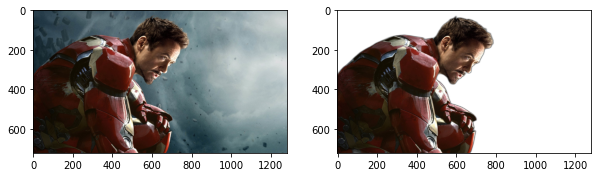

In [31]:
show_rembg('res/resolutions/ironman-1280x720.jpg')

1280x720, 1.1초 정도.

it takes 1.022125482559204 seconds for removing bg.


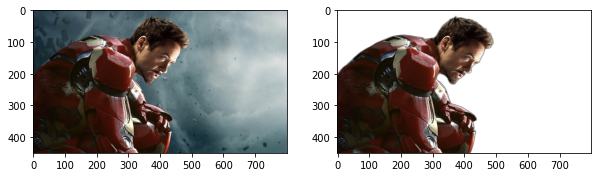

In [32]:
show_rembg('res/resolutions/ironman-800x450.jpg')

800x450, 0.9초 정도.

it takes 0.9095845222473145 seconds for removing bg.


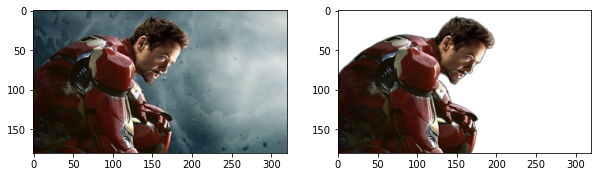

In [33]:
show_rembg('res/resolutions/ironman-320x180.jpg')

320x180, 0.8초 정도.

참고로 테스트한 PC의 성능은,

![my-pc](res/my-pc.jpg)

## 소감

몇가지 자잘한 테스트를 해본 것으로 rembg나 그 기반이 되는 U2-Net 모델의 성능 등에 대해서 뭔가 결론을 낼 수는 없을 것 같다. 심지어 내가 잘 모르는 영역이기도 하고해서 그냥 간단히 써본 소감만 적어보고자 한다.

- 일단 사진을 돌리면서 내가 의도한 부분을 얼추 처리해주는 것 같아서 신기하다.
- 퀄리티는 경계 부분이 얼마나 또렷한지 왠지 학습되었을 것 같은 대상이냐에 따라 다른 것 같다. (풍경은 특히 어려운 듯)
- 완전히 맡기기보다 1차적인 윤곽을 잡아주는 등 유저와 인터랙션하면서 협업하는데 사용하면 훨씬 유용할 것 같다.
- 해상도가 작을수록 처리시간이 덜 걸리는건 맞으나 드라마틱하게 떨어지진 않는 것 같다.
- 그래서 이걸 그대로 프레임마다 실시간으로 쓰기에는 무리인 것 같다. (이쪽을 잘 몰라서 최적화가 가능한지 모르겠다.)